Import Dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Data Collecting and Processing

In [25]:
loan_data=pd.read_csv(r"C:\Users\Azmeen Khatoon\Downloads\Loan_Data.csv")

In [5]:
type(loan_data)

pandas.core.frame.DataFrame

In [7]:
loan_data.shape

(614, 13)

In [8]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [26]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
loan_data=loan_data.dropna()

In [35]:
loan_data.shape

(480, 13)

In [30]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [38]:
loan_data.replace({'Education':{'Graduate':1,'Not Graduate':0},'Self_Employed':{'No':0,'Yes':1},
                   'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2},'Loan_Status':{'N':0,'Y':1},
                  'Gender':{'Male':0,'Female':1},'Married':{'No':0,'Yes':1}},inplace=True)

In [39]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,0,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,LP002984,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [31]:
loan_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [33]:
loan_data=loan_data.replace(to_replace='3+',value=4)

In [34]:
loan_data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

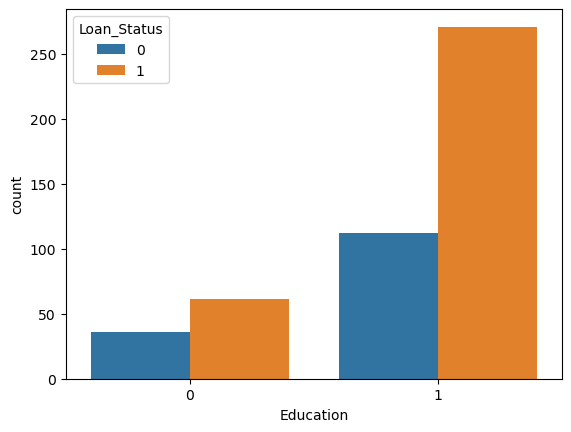

In [40]:
sns.countplot(x='Education',hue='Loan_Status',data=loan_data)

<AxesSubplot:xlabel='Married', ylabel='count'>

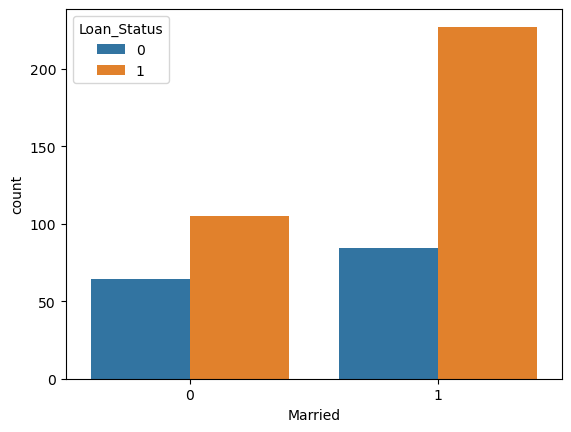

In [41]:
sns.countplot(x='Married',hue='Loan_Status',data=loan_data)

<AxesSubplot:xlabel='Gender', ylabel='count'>

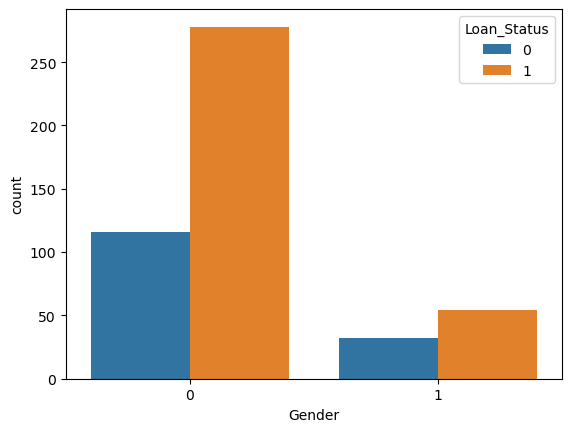

In [42]:
sns.countplot(x='Gender',hue='Loan_Status',data=loan_data)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

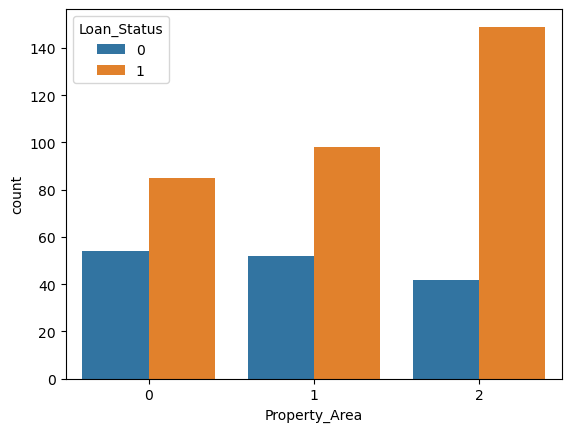

In [43]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=loan_data)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

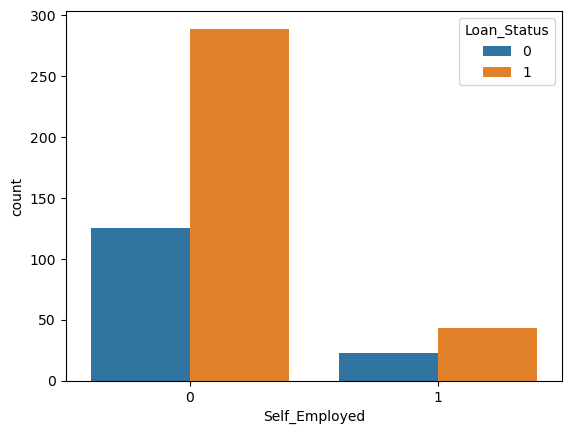

In [44]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=loan_data)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

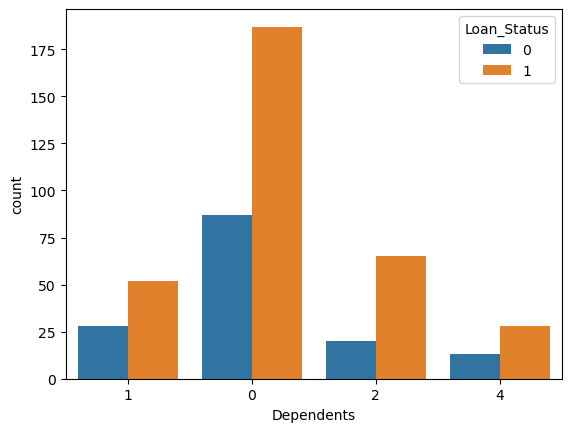

In [45]:
sns.countplot(x='Dependents',hue='Loan_Status',data=loan_data)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

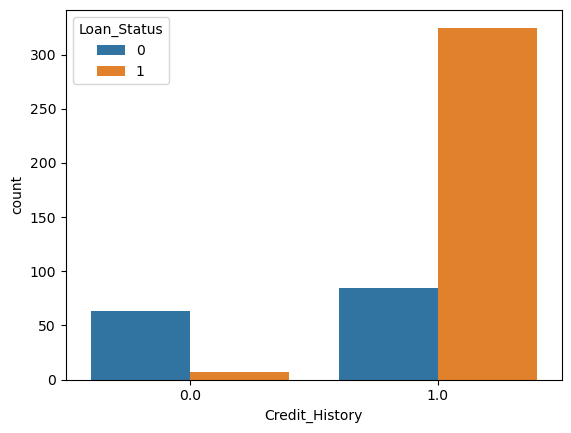

In [46]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=loan_data)

In [51]:
#seperating data and label
X=loan_data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=loan_data['Loan_Status']

In [53]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         0        1          1          1              0             4583   
2         0        1          0          1              1             3000   
3         0        1          0          0              0             2583   
4         0        0          0          1              0             6000   
5         0        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       1        0          0          1              0             2900   
610       0        1          4          1              0             4106   
611       0        1          1          1              0             8072   
612       0        1          2          1              0             7583   
613       1        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train Test Split

In [64]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

In [84]:
print(X.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the Model

In [89]:
classifier=svm.SVC(kernel='linear')

In [87]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [71]:
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [70]:
print("Accuracy on training data:",training_data_accuracy)

Accuracy on training data: 0.7662037037037037


In [72]:
X_test_prediction=classifier.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [73]:
print("Accuracy on testing data:",testing_data_accuracy)

Accuracy on testing data: 0.8125
